In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")
#sns.set_context("poster")

# Data Preprocessing

Most of Machine Learning algorithms make assumptions on your data, for example that the scales are comparable or simply they work only on numerical data. This implies that we need to pre-process the data. 
User oriented applications, such as BigML, do that automatically. However, when you use a language such as Python or R, you have to do it manually and decide for each attribute. 

In the Machine Learning process (see figure below) pre-processing is the first step after loading and examining your data. 

There are 4 basic processes that we will treat separatelty. Depending on the algorithm that we will use, we'll need to apply all of them or only some:

        1) Rescale data.
        2) Standarize data.
        3) Normalize data. 
        4) Binarize data. 
        
Before the pre-processing there are three(3) important steps:

        a) Load your dataset
        b) Examine it and get rid of everything that doesn't apply.
        c) Split the dataset into the input and output variables.
        
You will observe that scikit-learn provides two equivalent ways. First you can use the fit() function to prepare your data and later the transform() function. Or you can use the combined fit-and-transform. 

![text](ML_process.png)

<img src="Pima_indians_cowboy_1889.jpg">

In this exercise we will use one of the traditional Machine Learning dataset, the Pima Indians diabetes dataset.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, <b>Outcome</b>. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
<blockquote>
        <ul style="list-style-type:square;">
            <li>Pregnancies</li> 
            <li>Glucose</li>
            <li>BloodPressure</li>
            <li>SkinThickness</li>
            <li>Insulin</li>
            <li>BMI</li>
            <li>DiabetesPedigreeFunction</li>
            <li>Age</li>
            <li>Outcome</li>
        </ul>
</blockquote>

In [2]:
# Load the Pima indians dataset and separate input and output components 

from numpy import set_printoptions
set_printoptions(precision=3)

filename="pima-indians-diabetes.data.csv"
names=["pregnancies", "glucose", "pressure", "skin", "insulin", "bmi", "pedi", "age", "outcome"]
p_indians=pd.read_csv(filename, names=names)
p_indians.head()

# First we separate into input and output components
array=p_indians.values
X=array[:,0:8]
Y=array[:,8]
X
pd.DataFrame(X).head()

,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


<h1>Rescale Data </h1>

It is very common that the attributes have very different scales. Therefore, many machine learning algorithms benefit from rescalling the attributes to all have the same scale. Normally between 0 and 1. This process is commonly called normalization. 

This is important with optimization algorithms that use gradient descent. Also with algorithms, like regressions, that weight inputs like regression or neural networks. It is also needed when the the algorithms use distances such as the case of k-means or k-nn(K-Nearest Neighbors). 

For rescaling your data, you use the <b>MinMaxScaler</b> class.

In [3]:
# Rescale data between 0 and 1

p_indians.head()

from sklearn.preprocessing import MinMaxScaler

# Scale between 0 and 1
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)

rescaledX

,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[0.353, 0.744, 0.59 , ..., 0.501, 0.234, 0.483],
       [0.059, 0.427, 0.541, ..., 0.396, 0.117, 0.167],
       [0.471, 0.92 , 0.525, ..., 0.347, 0.254, 0.183],
       ...,
       [0.294, 0.608, 0.59 , ..., 0.39 , 0.071, 0.15 ],
       [0.059, 0.633, 0.492, ..., 0.449, 0.116, 0.433],
       [0.059, 0.467, 0.574, ..., 0.453, 0.101, 0.033]])

<h1>Standarize Data </h1>

Standarization is a technique that assumes a Gaussians distribution but different means and standard deviations.
Transforming them to a Gaussian of mean 0 and standard deviation of 1. 

It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with 
rescaled data, such as linear regression, logistic regression or LDA (linear discriminant analysis).

For standarizing you use the <b>StandardScaler</b> class. 


In [4]:
# Standarize data (0 mean, 1 stdev)

from sklearn.preprocessing import StandardScaler

p_indians.head()

scaler=StandardScaler().fit(X)
rescaledX=scaler.transform(X)

rescaledX

,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[ 0.64 ,  0.848,  0.15 , ...,  0.204,  0.468,  1.426],
       [-0.845, -1.123, -0.161, ..., -0.684, -0.365, -0.191],
       [ 1.234,  1.944, -0.264, ..., -1.103,  0.604, -0.106],
       ...,
       [ 0.343,  0.003,  0.15 , ..., -0.735, -0.685, -0.276],
       [-0.845,  0.16 , -0.471, ..., -0.24 , -0.371,  1.171],
       [-0.845, -0.873,  0.046, ..., -0.202, -0.474, -0.871]])

<b><font color="red" size=6>Mission 1</font>

a) Sometimes we only want to standarize some attributes and not all. 
For the sake of example, let's say that we only want standarize glucose.
<br><br>
b) Create a new X with all the attributes of the all X but the standarized glucose.
<br><br>
c) Do the same Scaling (from 0 to 1) instead of Standarizing. 
<br><br>
hint: we are dealing with numpy arrays and not DataFrames here, you should use np.concatenate()
</b>

In [5]:
filename = "pima-indians-diabetes.data.csv"
names = ["pregnancies", "glucose", "pressure", "skin", "insulin", "bmi", "pedi", "age", "outcome"]
p_indians = pd.read_csv(filename, names = names)

#separate into input and output components and convert the dataframe into an array
array = p_indians.values

# select the independent variables
Xa = array[:, :1]
Xb = array[:, 2:8]
glucose = array[:, 1:2]

#put together column 1 and column 3-8 again
Xx = np.concatenate((Xa, Xb), axis = 1)
Xx

array([[ 6.   , 72.   , 35.   , ..., 33.6  ,  0.627, 50.   ],
       [ 1.   , 66.   , 29.   , ..., 26.6  ,  0.351, 31.   ],
       [ 8.   , 64.   ,  0.   , ..., 23.3  ,  0.672, 32.   ],
       ...,
       [ 5.   , 72.   , 23.   , ..., 26.2  ,  0.245, 30.   ],
       [ 1.   , 60.   ,  0.   , ..., 30.1  ,  0.349, 47.   ],
       [ 1.   , 70.   , 31.   , ..., 30.4  ,  0.315, 23.   ]])

In [6]:
#standardise dependent variable
scale = StandardScaler().fit(glucose)
standardisedGlucose = scale.transform(glucose)

new_X = np.concatenate((standardisedGlucose, Xx), axis = 1)
new_X

array([[ 8.483e-01,  6.000e+00,  7.200e+01, ...,  3.360e+01,  6.270e-01,
         5.000e+01],
       [-1.123e+00,  1.000e+00,  6.600e+01, ...,  2.660e+01,  3.510e-01,
         3.100e+01],
       [ 1.944e+00,  8.000e+00,  6.400e+01, ...,  2.330e+01,  6.720e-01,
         3.200e+01],
       ...,
       [ 3.301e-03,  5.000e+00,  7.200e+01, ...,  2.620e+01,  2.450e-01,
         3.000e+01],
       [ 1.598e-01,  1.000e+00,  6.000e+01, ...,  3.010e+01,  3.490e-01,
         4.700e+01],
       [-8.730e-01,  1.000e+00,  7.000e+01, ...,  3.040e+01,  3.150e-01,
         2.300e+01]])

In [7]:
#rescale glucose
from sklearn.preprocessing import MinMaxScaler as minmax

scaler = minmax(feature_range = (0,1))
rescaledGlucose = scaler.fit_transform(glucose)
rescaledGlucose

array([[0.744],
       [0.427],
       [0.92 ],
       [0.447],
       [0.688],
       [0.583],
       [0.392],
       [0.578],
       [0.99 ],
       [0.628],
       [0.553],
       [0.844],
       [0.698],
       [0.95 ],
       [0.834],
       [0.503],
       [0.593],
       [0.538],
       [0.518],
       [0.578],
       [0.633],
       [0.497],
       [0.985],
       [0.598],
       [0.719],
       [0.628],
       [0.739],
       [0.487],
       [0.729],
       [0.588],
       [0.548],
       [0.794],
       [0.442],
       [0.462],
       [0.613],
       [0.518],
       [0.693],
       [0.513],
       [0.452],
       [0.558],
       [0.905],
       [0.668],
       [0.533],
       [0.859],
       [0.799],
       [0.905],
       [0.734],
       [0.357],
       [0.518],
       [0.528],
       [0.518],
       [0.508],
       [0.442],
       [0.884],
       [0.754],
       [0.367],
       [0.94 ],
       [0.503],
       [0.734],
       [0.528],
       [0.422],
       [0.668],
       [

<h1>Normalize Data </h1>

Normalization works with observations (rows) instead of attributes (columns). 

The idea here is to have a length 1 for each observation (a vector of length 1 in linear algebra).

It is useful in algorithms that weigth input values as a whole, such is the case of Neural Networks
and also distance algorithms such as K-nn (Nearest Neighbors)

For normalization you use the <b>Normalizer</b> class. 


In [8]:
from sklearn.preprocessing import Normalizer

p_indians.head()

scaler=Normalizer().fit(X)
normalizedX=scaler.transform(X)

normalizedX


,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[0.034, 0.828, 0.403, ..., 0.188, 0.004, 0.28 ],
       [0.008, 0.716, 0.556, ..., 0.224, 0.003, 0.261],
       [0.04 , 0.924, 0.323, ..., 0.118, 0.003, 0.162],
       ...,
       [0.027, 0.651, 0.388, ..., 0.141, 0.001, 0.161],
       [0.007, 0.838, 0.399, ..., 0.2  , 0.002, 0.313],
       [0.008, 0.736, 0.554, ..., 0.241, 0.002, 0.182]])

<h1>Binarize Data </h1>

Binarize consist in transforming data using a binary threshold; all values above are marked as 1
and all values below as zero. 

Sometimes you want to transform probabilities into crisp values. Many times it is used in feature engineering
when you add a new feature. 

For binarization you use the <b>Binarizer</b> class. 


In [9]:
from sklearn.preprocessing import Binarizer

p_indians.head()

binarizer=Binarizer(threshold=0.0).fit(X)
binaryX=binarizer.transform(X)

binaryX[:10,0:8]

,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 1., 1.]])

<b><font color="red" size=6>Mission 2</font>

a) We want to highlight everybody with a glucose level over 140 setting it to 1. 
<br><br>
b) We'll do the same with blood pressure over 80. 
<br><br>
c) Finally we will create a new attribute that we will name warning, when both 
glucose and blood pressure is set to 1, being 0 otherwise. 
<br><br>
d) We need a new X (let's call it X_new) with these attributes instead of the original ones.

</b>

(array([576.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 192.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

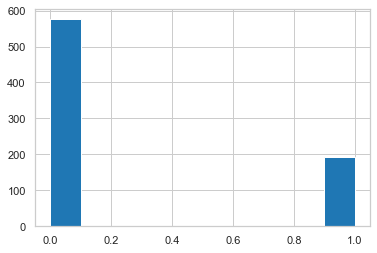

In [10]:
X_glucose_binary = Binarizer(threshold=140).fit(X[:,1:2]).transform(X[:,1:2])
plt.hist(X_glucose_binary)

(array([603.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 165.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

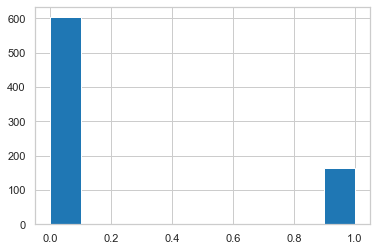

In [11]:
X_pressure_binary=Binarizer(threshold=80).fit(X[:,2:3]).transform(X[:,2:3])
plt.hist(X_pressure_binary)

(array([703.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  65.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

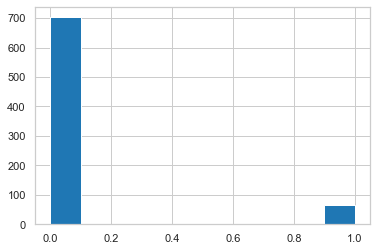

In [12]:
X_combined = np.add(X_glucose_binary, X_pressure_binary)
X_warning = Binarizer(threshold=1).fit(X_combined).transform(X_combined)
plt.hist(X_warning)

In [13]:
X_new = X.copy()
X_new[:,1:2] = X_glucose_binary
X_new[:,2:3] = X_pressure_binary

X_new = np.concatenate((X_new, X_warning), axis=1)
X_new

new_names = ["pregnancies", "glucose", "pressure", "skin", "insulin", "bmi", "pedi", "age", "warning"]
X_new_df = pd.DataFrame(X_new, columns = new_names)
X_new_df.head(20)

array([[ 6.   ,  1.   ,  0.   , ...,  0.627, 50.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   , ...,  0.351, 31.   ,  0.   ],
       [ 8.   ,  1.   ,  0.   , ...,  0.672, 32.   ,  0.   ],
       ...,
       [ 5.   ,  0.   ,  0.   , ...,  0.245, 30.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   , ...,  0.349, 47.   ,  0.   ],
       [ 1.   ,  0.   ,  0.   , ...,  0.315, 23.   ,  0.   ]])

,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,warning
0,6.0,1.0,0.0,35.0,0.0,33.6,0.627,50.0,0.0
1,1.0,0.0,0.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,1.0,0.0,0.0,0.0,23.3,0.672,32.0,0.0
3,1.0,0.0,0.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,0.0,0.0,35.0,168.0,43.1,2.288,33.0,0.0
5,5.0,0.0,0.0,0.0,0.0,25.6,0.201,30.0,0.0
6,3.0,0.0,0.0,32.0,88.0,31.0,0.248,26.0,0.0
7,10.0,0.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0
8,2.0,1.0,0.0,45.0,543.0,30.5,0.158,53.0,0.0
9,8.0,0.0,1.0,0.0,0.0,0.0,0.232,54.0,0.0
